# IMPORTING LIBRARIES

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# DATA PRE-PROCESSING

### Training Image Pre-Processing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\admin\\OneDrive\\Desktop\\PROJECTS\\Plant Diseases Prediction Model\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train',
label_mode="categorical",
image_size=(128,128)
) 

Found 70295 files belonging to 38 classes.


### Validation Image Pre-Processing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\admin\\OneDrive\\Desktop\\PROJECTS\\Plant Diseases Prediction Model\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
label_mode="categorical",
image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


In [8]:
for x,y in training_set:
    print(x.shape)
    print(y.shape)
    break
    

(32, 128, 128, 3)
(32, 38)


# BUILDING MODEL

In [10]:
cnn = tf.keras.models.Sequential()

### Building Convolutional Layer

In [12]:
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=32 , kernel_size=3 , padding='same' , activation='relu' , input_shape=(128,128,3)))
model.add(Conv2D(filters=32 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Conv2D(filters=64 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=64 , kernel_size=3 , padding='same' , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [16]:
model.add(Conv2D(filters=128 , kernel_size=3 , padding='same' , activation='relu' ))
model.add(Conv2D(filters=128 , kernel_size=3 , padding='same' , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [17]:
model.add(Conv2D(filters=256 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=256 , kernel_size=3 , padding='same' , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [18]:
model.add(Conv2D(filters=512 , kernel_size=3 , padding='same' , activation='relu' ))
model.add(Conv2D(filters=512 , kernel_size=3 , padding='same' , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

In [19]:
model.add(GlobalAveragePooling2D())

In [20]:
cnn.add(Flatten())

In [21]:
model.add(Dense(units=1500, activation='relu'))

In [22]:
model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) , loss='categorical_crossentropy' , metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 31, 31, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │         769,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,538,762 (21.13 MB)

 Trainable params: 5,538,762 (21.13 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING MODEL

In [27]:
training_history = model.fit(x=training_set , validation_data=validation_set , epochs = 5)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8340s 4s/step - accuracy: 0.4540 - loss: 1.9106 - val_accuracy: 0.8388 - val_loss: 0.4908
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6341s 3s/step - accuracy: 0.8750 - loss: 0.3849 - val_accuracy: 0.9190 - val_loss: 0.2450
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5544s 3s/step - accuracy: 0.9290 - loss: 0.2161 - val_accuracy: 0.9254 - val_loss: 0.2308
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6704s 3s/step - accuracy: 0.9506 - loss: 0.1497 - val_accuracy: 0.9480 - val_loss: 0.1646
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5946s 3s/step - accuracy: 0.9634 - loss: 0.1108 - val_accuracy: 0.9309 - val_loss: 0.2258


# MODEL EVALUATION

In [29]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1674s 762ms/step - accuracy: 0.9498 - loss: 0.1529


In [30]:
print(train_loss)

0.1397557556629181


In [31]:
print(train_acc)

0.954434871673584


In [32]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 425s 773ms/step - accuracy: 0.9316 - loss: 0.2250


In [33]:
print(val_loss)

0.22580264508724213


In [34]:
print(val_acc)

0.930855929851532


# SAVE MODEL

In [36]:
model.save("trained_model.keras")

# TRAINING HISTORY AND SAVING

In [38]:
training_history.history

{'accuracy': [0.6612703800201416,
  0.8925812840461731,
  0.9350878596305847,
  0.9536809325218201,
  0.9648765921592712],
 'loss': [1.1309016942977905,
  0.32957082986831665,
  0.19850844144821167,
  0.13912343978881836,
  0.10496959090232849],
 'val_accuracy': [0.8387776017189026,
  0.9189620018005371,
  0.9253926873207092,
  0.9480423331260681,
  0.930855929851532],
 'val_loss': [0.49075883626937866,
  0.24496565759181976,
  0.23082903027534485,
  0.16455203294754028,
  0.22580257058143616]}

In [39]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history , f)

# MODEL VISUALIZATION

In [44]:
epochs = [i for i in range (1,6)]

In [46]:
epochs

[1, 2, 3, 4, 5]

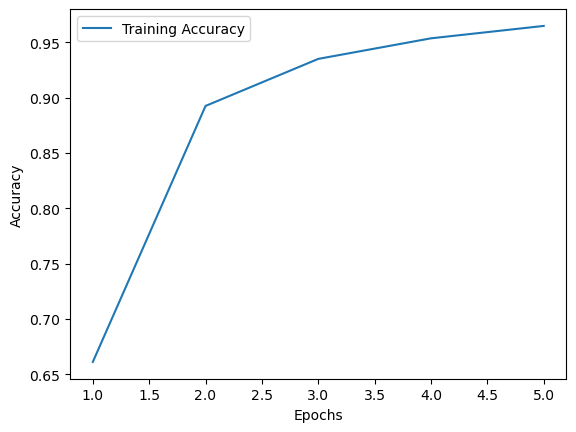

In [49]:
plt.plot(epochs, training_history.history['accuracy'] , label='Training Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

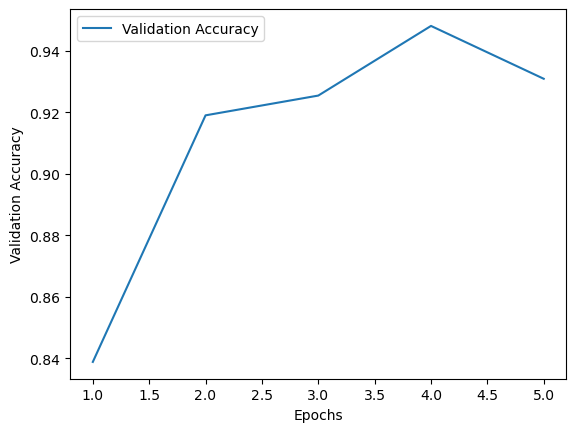

In [51]:
plt.plot(epochs, training_history.history['val_accuracy'] , label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

Text(0.5, 1.0, 'Visualization of Accuracy and Validation Accuracy vs. No. of Epochs')

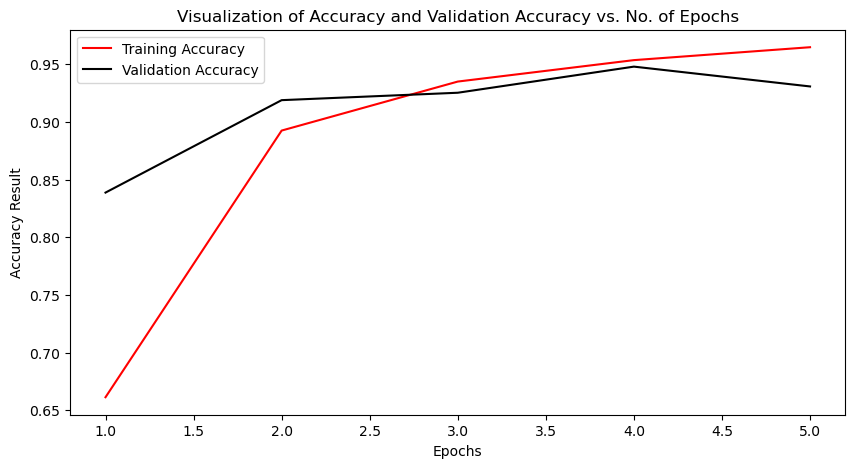

In [54]:
plt.figure(figsize=(10,5))
plt.plot(epochs, training_history.history['accuracy'] , color='red', label='Training Accuracy' )
plt.plot(epochs, training_history.history['val_accuracy'] , color='black', label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy Result')
plt.legend()
plt.title('Visualization of Accuracy and Validation Accuracy vs. No. of Epochs')

# MODEL METRICS EVALUATION

In [58]:
class_name = validation_set.class_names

In [60]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [63]:
# Here we are using validation set instead of test set, because validation set is properly arranged with classes whereas test set is just some random pictures

In [65]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\admin\\OneDrive\\Desktop\\PROJECTS\\Plant Diseases Prediction Model\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
label_mode="categorical",
shuffle=False,
image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


In [68]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 392s 712ms/step


In [69]:
y_pred, y_pred.shape

(array([[9.9981600e-01, 1.7378594e-06, 3.8013566e-09, ..., 8.6695505e-13,
         1.4683043e-12, 2.3633509e-10],
        [9.9951875e-01, 1.0877301e-06, 6.4623592e-08, ..., 6.5185679e-10,
         1.6465676e-11, 1.7683537e-07],
        [9.9999952e-01, 2.2846248e-08, 4.4437964e-09, ..., 3.2709520e-15,
         2.9907340e-13, 5.7620392e-10],
        ...,
        [5.1901608e-08, 1.5193673e-10, 7.2760440e-07, ..., 4.3042205e-09,
         6.3313976e-10, 9.9996400e-01],
        [2.0454308e-06, 5.8976340e-10, 3.4165603e-07, ..., 9.7973967e-08,
         3.7874686e-09, 9.9996293e-01],
        [3.7262765e-10, 7.7949348e-12, 4.0062866e-12, ..., 6.1303759e-14,
         1.1230880e-10, 9.9998868e-01]], dtype=float32),
 (17572, 38))

In [72]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [74]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [77]:
true_categories = tf.concat([y for x,y in test_set], axis=0)

In [78]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [83]:
y_true = tf.argmax(true_categories, axis=1)

In [85]:
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [88]:
from sklearn.metrics import classification_report , confusion_matrix

In [90]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.85      0.93      0.89       504
                                 Apple___Black_rot       0.97      0.96      0.96       497
                          Apple___Cedar_apple_rust       0.96      0.91      0.94       440
                                   Apple___healthy       0.94      0.89      0.92       502
                               Blueberry___healthy       0.89      0.98      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.97      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.92      0.

In [92]:
print(confusion_matrix(y_true, predicted_categories))

[[467   0   0 ...   0   0   0]
 [ 13 477   0 ...   0   0   0]
 [  5   0 401 ...   0   1   1]
 ...
 [  0   0   3 ... 456   0   0]
 [  0   0   0 ...   0 439   1]
 [  0   0   0 ...   0   0 480]]


In [94]:
confusion_matrix(y_true, predicted_categories).shape

(38, 38)